In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
tesla = yf.Ticker("TSLA")

In [3]:
tesla_data = tesla.history(period="max")

In [4]:
tesla_data.reset_index(inplace=True)

In [5]:
tesla_data_DataFrame = pd.DataFrame(tesla_data)
tesla_data_DataFrame.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
url = ' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [7]:
response = requests.get(url)
html_data = response.text

In [8]:
beautiful_soup = BeautifulSoup(html_data, 'html5lib')

In [9]:
data_list = []

for row in beautiful_soup.find("tbody").find_all('tr'):
    cols = row.find_all("td")
    date = cols[0].text
    revenue = cols[1].text
    data_list.append({"Date": date, "Revenue": revenue})

# Create the DataFrame using the data_list
tesla_revenue = pd.DataFrame(data_list)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$',"")
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',',"")

In [10]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [11]:
gme = yf.Ticker("GME")

In [12]:
gme_data = gme.history(period="max")

In [13]:
gme_data.reset_index(inplace = True)

In [14]:
gme_data_DataFrame = pd.DataFrame(gme_data)
gme_data_DataFrame.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [21]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [22]:
response = requests.get(url)
html_data = response.text
html_data

'<!DOCTYPE html>\n<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->\n<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src=

In [23]:
beautiful_soup = BeautifulSoup(html_data, 'html5lib')

In [24]:
data_list = []

for row in beautiful_soup.find("tbody").find_all('tr'):
    cols = row.find_all("td")
    date = cols[0].text
    revenue = cols[1].text
    data_list.append({"Date": date, "Revenue": revenue})

# Create the DataFrame using the data_list
gme_data = pd.DataFrame(data_list)
gme_data["Revenue"] = gme_data['Revenue'].str.replace('$',"")
gme_data["Revenue"] = gme_data['Revenue'].str.replace(',',"")

# Print the DataFrame to verify
print(gme_data)

    Date Revenue
0   2020    6466
1   2019    8285
2   2018    8547
3   2017    7965
4   2016    9364
5   2015    9296
6   2014    9040
7   2013    8887
8   2012    9551
9   2011    9474
10  2010    9078
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


In [25]:
gme_data.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


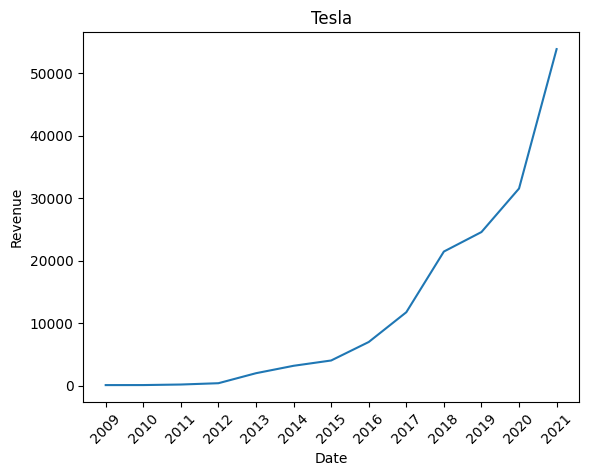

In [27]:
import matplotlib.pyplot as plt

def make_graph(x, y, z):
    y = pd.to_numeric(y)
    # Sort the DataFrame by the "Date" column
    sorted_data = pd.DataFrame({'Date': x, 'Revenue': y}).sort_values(by='Date')
    
    plt.plot(sorted_data['Date'], sorted_data['Revenue'])
    plt.title(z)
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

# Assuming you have a DataFrame named 'tesla_data' with columns 'Date' and 'Revenue'
make_graph(x=tesla_revenue['Date'], y=tesla_revenue['Revenue'], z='Tesla')


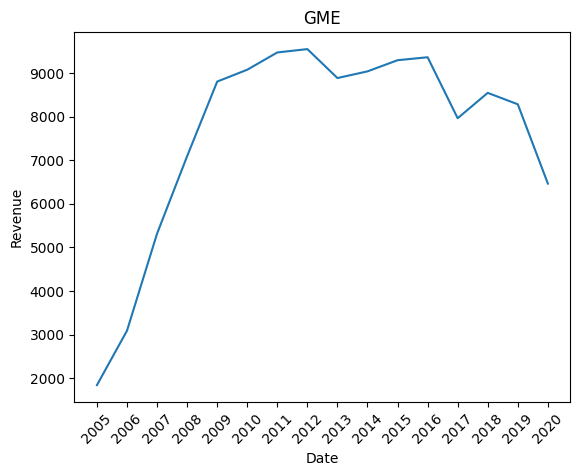

In [28]:
make_graph(x = gme_data['Date'], y = gme_data['Revenue'], z = 'GME')